## **Libraries Used**

In [ ]:
import pandas as pd

In [ ]:
import statistics

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
import seaborn as sns

In [ ]:
from sklearn import linear_model

## **PreProcessing**

In [ ]:
df = pd.read_csv("Real estate.csv")
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,NaN,19.5,306.59470,9.0,NaN,121.53951,NaN
2,2013.583,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,2013.500,13.3,NaN,5.0,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5.0,24.97937,NaN,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0.0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9.0,24.97433,NaN,50.0
411,2013.250,18.8,390.96960,7.0,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5.0,24.96674,121.54067,52.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     407 non-null    float64
 1   X2 house age                            410 non-null    float64
 2   X3 distance to the nearest MRT station  406 non-null    float64
 3   X4 number of convenience stores         411 non-null    float64
 4   X5 latitude                             410 non-null    float64
 5   X6 longitude                            412 non-null    float64
 6   Y house price of unit area              412 non-null    float64
dtypes: float64(7)
memory usage: 22.8 KB


In [ ]:
df.isnull().sum()

X1 transaction date                       7
X2 house age                              4
X3 distance to the nearest MRT station    8
X4 number of convenience stores           3
X5 latitude                               4
X6 longitude                              2
Y house price of unit area                2
dtype: int64

In [ ]:
x1mean = df["X1 transaction date"].mean()
x1mean

2013.1509189189194

In [ ]:
x2mean = df["X2 house age"].mean()
x2mean

17.623414634146343

In [ ]:
x3mean = df["X3 distance to the nearest MRT station"].mean()
x3mean

1087.3476437192119

In [ ]:
x4mean = df["X4 number of convenience stores"].mean()
x4mean

4.104622871046229

In [ ]:
x5mean = df["X5 latitude"].mean()
x5mean

24.9690411219512

In [ ]:
x6mean = df["X6 longitude"].mean()
x6mean

121.53331538834966

In [ ]:
Ymedian = statistics.median(df["Y house price of unit area"])
Ymedian

38.4

In [ ]:
df["X1 transaction date"].fillna(x1mean, inplace = True)

In [ ]:
df["X2 house age"].fillna(x2mean, inplace = True)

In [ ]:
df["X3 distance to the nearest MRT station"].fillna(x3mean, inplace = True)

In [ ]:
df["X4 number of convenience stores"].fillna(x4mean, inplace = True)

In [ ]:
df["X5 latitude"].fillna(x5mean, inplace = True)

In [ ]:
df["X6 longitude"].fillna(x6mean, inplace = True)

In [ ]:
df["Y house price of unit area"].fillna(Ymedian, inplace = True)

## **Splitting the data (70/30)**

In [ ]:
X = df[['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

In [ ]:
Y = df["Y house price of unit area"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((289, 6), (125, 6), (289,), (125,))

## **1. Linear Regression(Ordinary Least Squares)** 

In [ ]:
reg1 = LinearRegression().fit(X_train,Y_train)

In [ ]:
reg1.coef_

array([ 4.82768458e+00, -2.53497405e-01, -3.05460851e-03,  1.34421653e+00,
        2.76226332e+02,  8.29827101e+01])

In [ ]:
reg1.intercept_

-26660.916355396304

### **Training Error and Accuracy**

In [ ]:
Y1_pred_train = reg1.predict(X_train)

In [ ]:
Y1_pred_train

array([48.10605557, 37.04941204, 43.14582214, 47.92112454, 44.95177784,
       48.57840423,  8.97685275, 47.19298577, 31.8462119 , 40.99154045,
       41.03850144, 45.33669462, 32.07913058, 42.67462012, 49.73106651,
       28.47654364, 37.61907878, 14.28000956, 46.05328572, 52.40675288,
       45.88483561, 23.24977577, 47.33111718, 39.97407609, 35.97596601,
       32.73170948, 46.02561798, 43.80549204, 29.84859185, 29.26832525,
       52.03185935, 35.45120232, 36.37106317, 36.63167436, 48.09551001,
       38.50474495, 47.95766825, 12.09082569, 43.62781699, 13.49913597,
       41.09136371, 42.31549764, 45.75528701, 38.65132947, 43.12022261,
       34.98574387, 44.514353  , 33.0192849 , 36.03120704, 31.04120528,
       45.19465114, 33.33229827, 28.22440157, 42.14477069, 24.75599578,
       46.11793537, 47.95869671, 49.14693425, 34.28552732, 49.10205863,
       46.04889138, 53.58832428, 42.15172752, 37.2748471 , 44.63383569,
       38.22528191, 46.85214607, 37.97032924, 25.69360594, 40.26

In [ ]:
Y_train

377    56.8
128    60.7
364    33.1
254    51.8
190    42.3
       ... 
319    26.9
206    44.0
332    39.6
129    41.0
130    37.5
Name: Y house price of unit area, Length: 289, dtype: float64

In [ ]:
mean_squared_error(Y_train,Y1_pred_train)

72.21054469609783

In [ ]:
r2_score(Y_train, Y1_pred_train)

0.6021773629143302

### **Testing Error and Accuracy**

In [ ]:
Y1_pred_test = reg1.predict(X_test)

In [ ]:
mean_squared_error(Y_test, Y1_pred_test)

94.27507102517012

In [ ]:
r2_score(Y_test, Y1_pred_test)

0.49449730201844755

### **Plot**

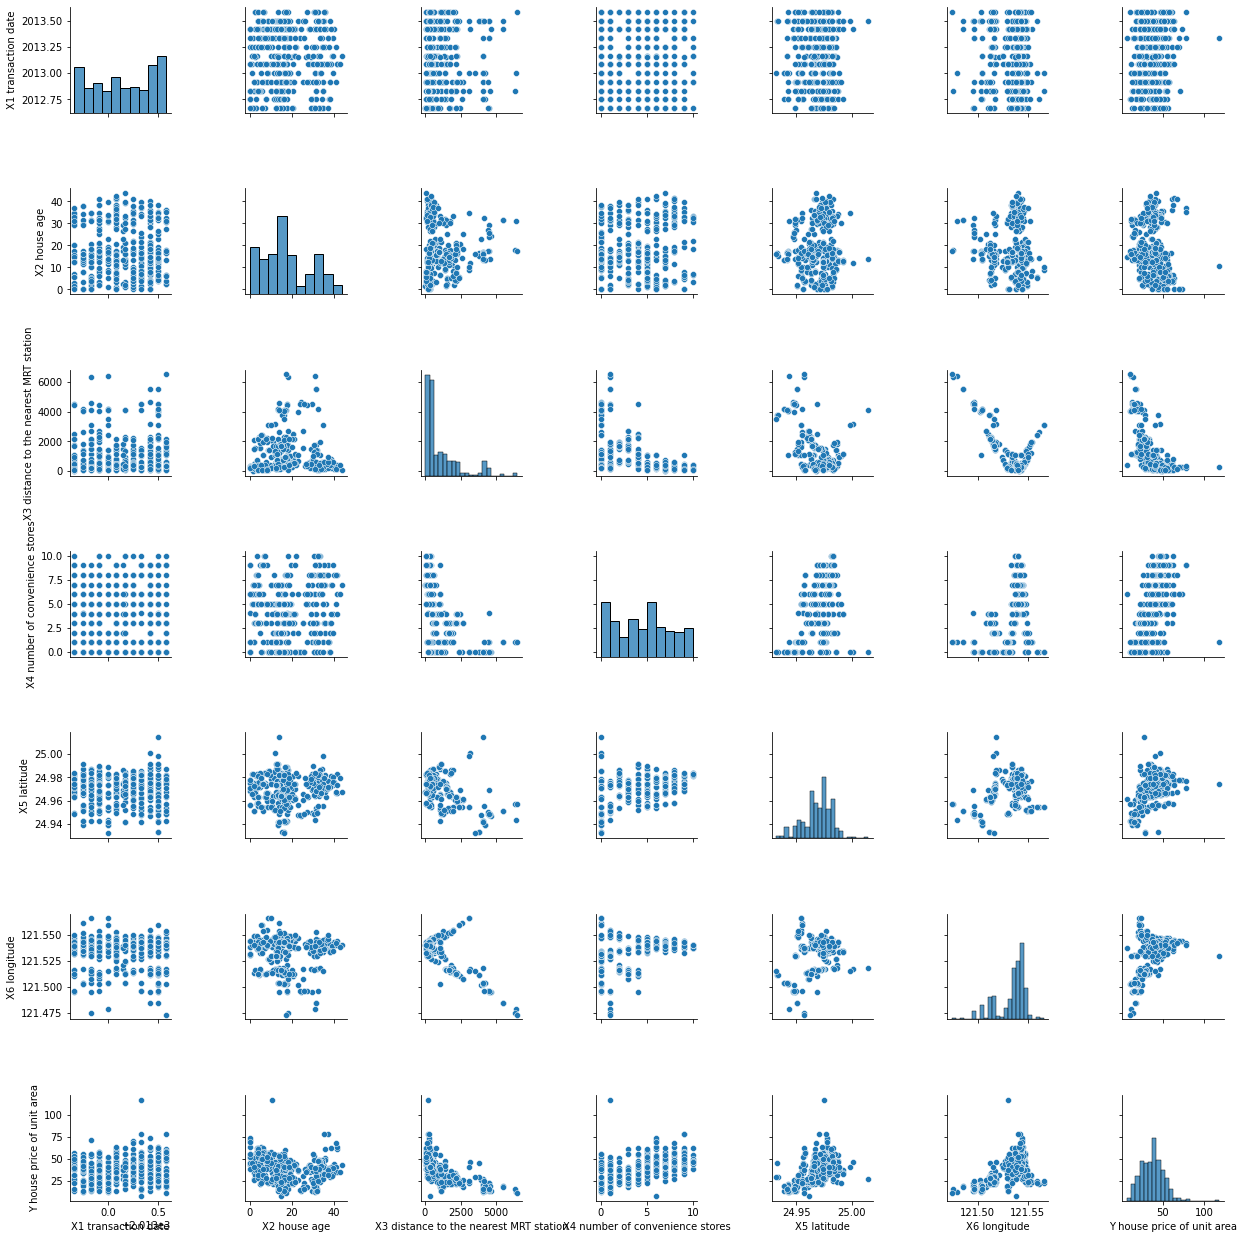

In [ ]:
sns.pairplot(df)

## **2. Linear Regression Model (Ridge)**

In [ ]:
reg2 = linear_model.Ridge(alpha=0.5)
reg2.fit(X_train, Y_train)

Ridge(alpha=0.5)

In [ ]:
reg2.coef_

array([ 5.29274328e+00, -2.43142026e-01, -5.17584317e-03,  1.50659251e+00,
        1.39398123e+01,  1.88271989e+00])

In [ ]:
reg2.intercept_

-11190.39542993792

### **Training Error and Accuracy**

In [ ]:
Y2_pred_train = reg2.predict(X_train)

In [ ]:
Y2_pred_train

array([53.242762  , 39.54512605, 41.91228434, 44.77705086, 43.84958491,
       47.3878371 ,  7.95503799, 49.39558114, 33.60058798, 42.917883  ,
       43.5680915 , 43.91859495, 32.10606056, 44.52628928, 49.88295134,
       30.37001889, 42.27286971, 16.73561876, 47.10237792, 52.88884253,
       45.91879146, 27.89482255, 48.29824331, 37.67465636, 35.14051759,
       33.01584607, 45.93949592, 45.77653249, 29.27754537, 29.69755569,
       50.41341905, 35.96810902, 24.0914191 , 36.72272731, 45.41769147,
       37.753515  , 45.61960793, 14.06823134, 45.53955505, 15.87604484,
       41.75356485, 40.12493499, 47.76084952, 33.3126436 , 37.95965005,
       35.72993026, 41.82024989, 33.6135518 , 35.2944865 , 30.46963094,
       47.46223717, 34.1507462 , 27.86844788, 40.78237564, 29.56004925,
       48.32564732, 48.90131664, 44.69656623, 34.68996984, 47.55117469,
       46.55150353, 54.18771415, 42.52556494, 37.39900656, 44.16828566,
       32.84903171, 44.39367892, 36.58233777, 25.93737796, 42.11

In [ ]:
Y_train

377    56.8
128    60.7
364    33.1
254    51.8
190    42.3
       ... 
319    26.9
206    44.0
332    39.6
129    41.0
130    37.5
Name: Y house price of unit area, Length: 289, dtype: float64

In [ ]:
mean_squared_error(Y_train,Y2_pred_train)

78.79568286111693

In [ ]:
r2_score(Y_train, Y2_pred_train)

0.5658984919903313

### **Testing Error and Accuracy**

In [ ]:
Y2_pred_test = reg2.predict(X_test)

In [ ]:
mean_squared_error(Y_test, Y2_pred_test)

93.5398246177431

In [ ]:
r2_score(Y_test, Y2_pred_test)

0.498439691439044

### **Plot**

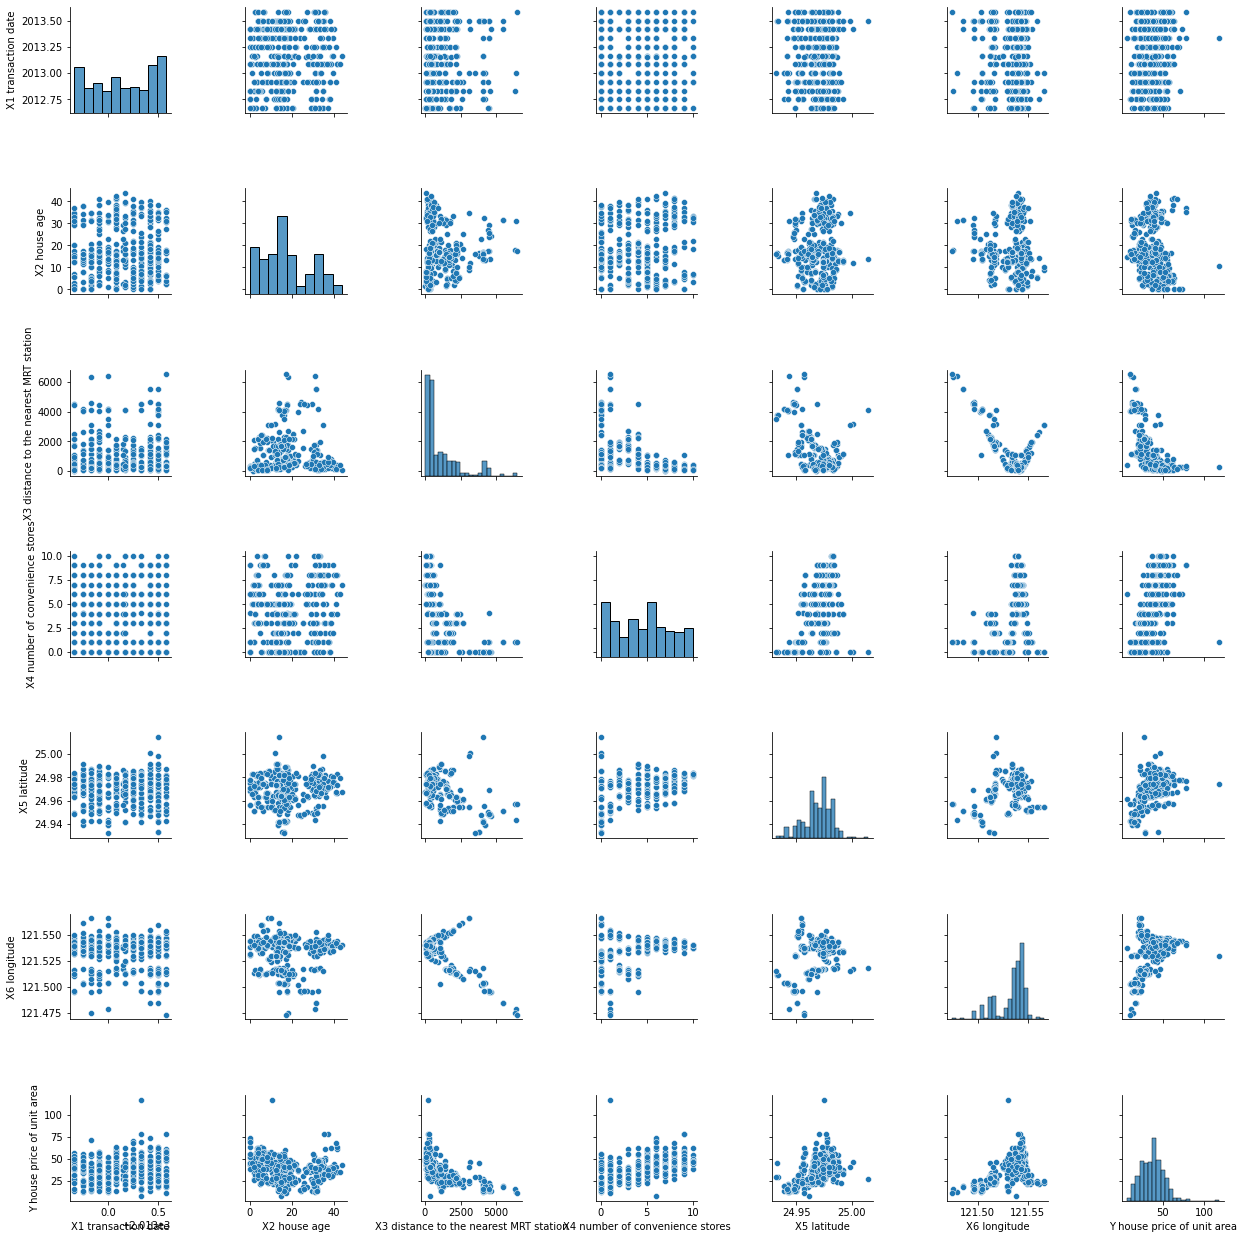

In [ ]:
sns.pairplot(df)

## **3. Linear Regression (Lasso)**

In [ ]:
reg3 = linear_model.Lasso(alpha=0.1)
reg3.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [ ]:
reg3.coef_

array([ 4.15928182, -0.24130704, -0.00526412,  1.50776942,  0.        ,
        0.        ])

In [ ]:
reg3.intercept_

-8331.61762341014

### **Training Error and Accuracy**

In [ ]:
Y3_pred_train = reg3.predict(X_train)

In [ ]:
Y3_pred_train

array([53.2613528 , 39.78456334, 41.55444048, 45.16801797, 43.3946169 ,
       47.58051206,  7.64166655, 49.47340263, 34.03311588, 43.10019518,
       43.60506601, 43.47168875, 32.35979621, 45.08177459, 49.84819627,
       30.73304726, 42.59499111, 16.8930234 , 46.7624272 , 52.95954576,
       45.4263622 , 28.08720293, 48.04396654, 37.59310143, 35.16496428,
       32.86780537, 46.01547977, 46.04920294, 29.76718282, 30.09351902,
       49.9935596 , 36.11214879, 23.18528728, 37.14501146, 45.73403639,
       37.48324304, 45.10642656, 14.68481154, 46.09902887, 16.22255404,
       41.8003828 , 39.90737007, 47.93649086, 32.84957331, 37.87715515,
       35.35035262, 42.15588013, 33.24213205, 35.83058006, 30.79801856,
       47.1815306 , 33.88836832, 28.37629741, 40.99993644, 29.37572096,
       48.03232103, 48.64230526, 44.17046753, 34.21031508, 47.82631674,
       46.27078411, 53.97523551, 42.36840824, 37.77831647, 43.85859558,
       32.48022221, 44.16312892, 36.05711719, 26.32401974, 42.48

In [ ]:
Y_train

377    56.8
128    60.7
364    33.1
254    51.8
190    42.3
       ... 
319    26.9
206    44.0
332    39.6
129    41.0
130    37.5
Name: Y house price of unit area, Length: 289, dtype: float64

In [ ]:
mean_squared_error(Y_train,Y3_pred_train)

79.62551490541263

In [ ]:
r2_score(Y_train, Y3_pred_train)

0.5613267777955517

### **Testing Error and Accuracy**

In [ ]:
Y3_pred_test = reg3.predict(X_test)

In [ ]:
mean_squared_error(Y_test, Y3_pred_test)

93.71168915730729

In [ ]:
r2_score(Y_test, Y3_pred_test)

0.49751815420239887

### **Plot**

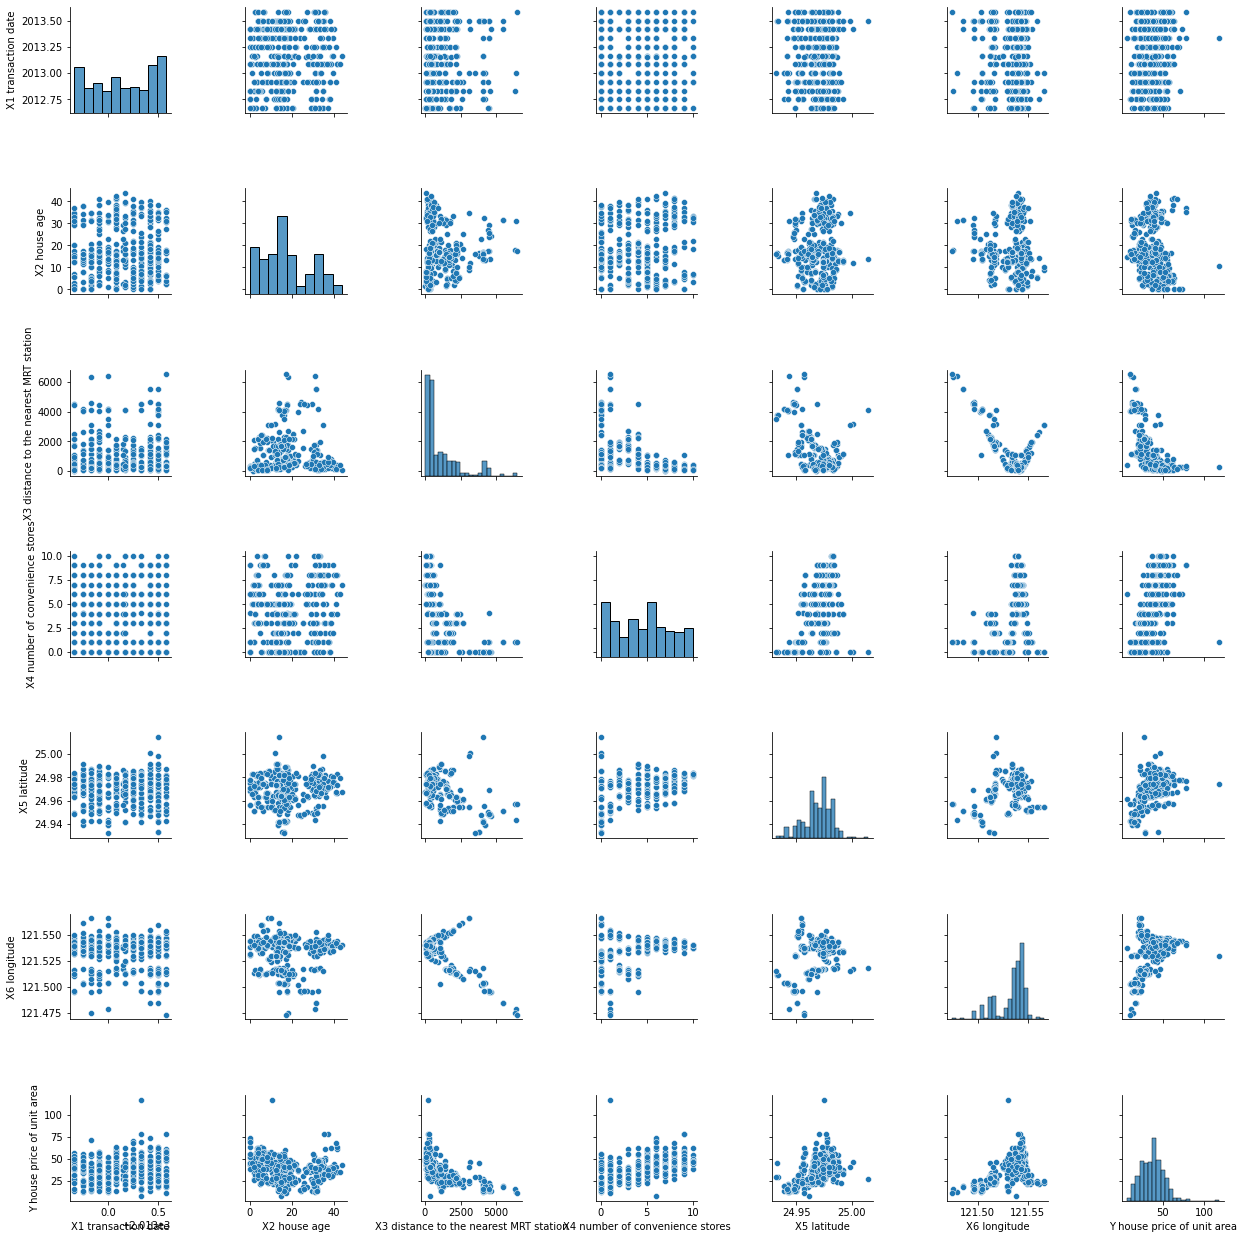

In [ ]:
sns.pairplot(df)

# **Splitting the data (60/40)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.40)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((248, 6), (166, 6), (248,), (166,))

## **1. Linear Regression(Ordinary Least Squares)** 

In [ ]:
reg4 = LinearRegression().fit(X_train,Y_train)

In [ ]:
reg4.coef_

array([ 4.99437913e+00, -1.91041045e-01, -4.07687561e-03,  1.31808124e+00,
        2.09767077e+02, -1.71149160e+00])

In [ ]:
reg4.intercept_

-15043.414784984321

### **Training Error and Accuracy**

In [ ]:
Y4_pred_train = reg4.predict(X_train)

In [ ]:
Y4_pred_train

array([37.2426691 , 34.64812958, 33.75194816, 24.61009906, 37.246368  ,
       45.02262471, 26.1554139 , 46.61457134, 47.5053536 ,  8.94970436,
       45.22106288, 34.88141491, 25.34983188, 45.24375624, 32.92642135,
       30.23869532, 28.90792307, 46.4949627 , 31.81708409, 36.34571632,
       41.77810282, 42.85078002, 33.04203391, 46.84115894, 31.7055342 ,
       40.87899723, 52.99613221, 43.10466727, 15.78951668, 26.16722872,
       41.34457581, 37.89763171, 34.73694197, 44.17033587, 26.25579644,
       32.46514286, 24.27230277, 40.67573988, 38.14245923, 34.96583916,
       41.88367794, 45.11761795, 43.99587867, 36.06285828, 48.9623671 ,
       51.67674071, 30.10756908, 35.25289545, 43.50017004, 46.98138335,
       42.13685961, 11.51342875, 44.56967613, 15.78951668, 36.82859472,
       49.65501871, 33.59208546, 46.58435928, 41.68345965, 51.76664153,
       33.87489644, 45.89580554, 39.37856766, 38.79453806, 17.22185246,
       42.7653747 , 22.62303449, 36.3000965 , 36.72560502, 38.68

In [ ]:
Y_train

319    26.9
20     29.3
112    23.1
93     16.1
91     43.2
       ... 
405    37.2
232    17.4
293    42.5
4      43.1
297    28.5
Name: Y house price of unit area, Length: 248, dtype: float64

In [ ]:
mean_squared_error(Y_train,Y4_pred_train)

68.64911623669971

In [ ]:
r2_score(Y_train, Y4_pred_train)

0.5897248248766711

### **Testing Error and Accuracy**

In [ ]:
Y4_pred_test = reg4.predict(X_test)

In [ ]:
mean_squared_error(Y_test, Y4_pred_test)

94.76814089461162

In [ ]:
r2_score(Y_test, Y4_pred_test)

0.5374628378144427

### **Plot**

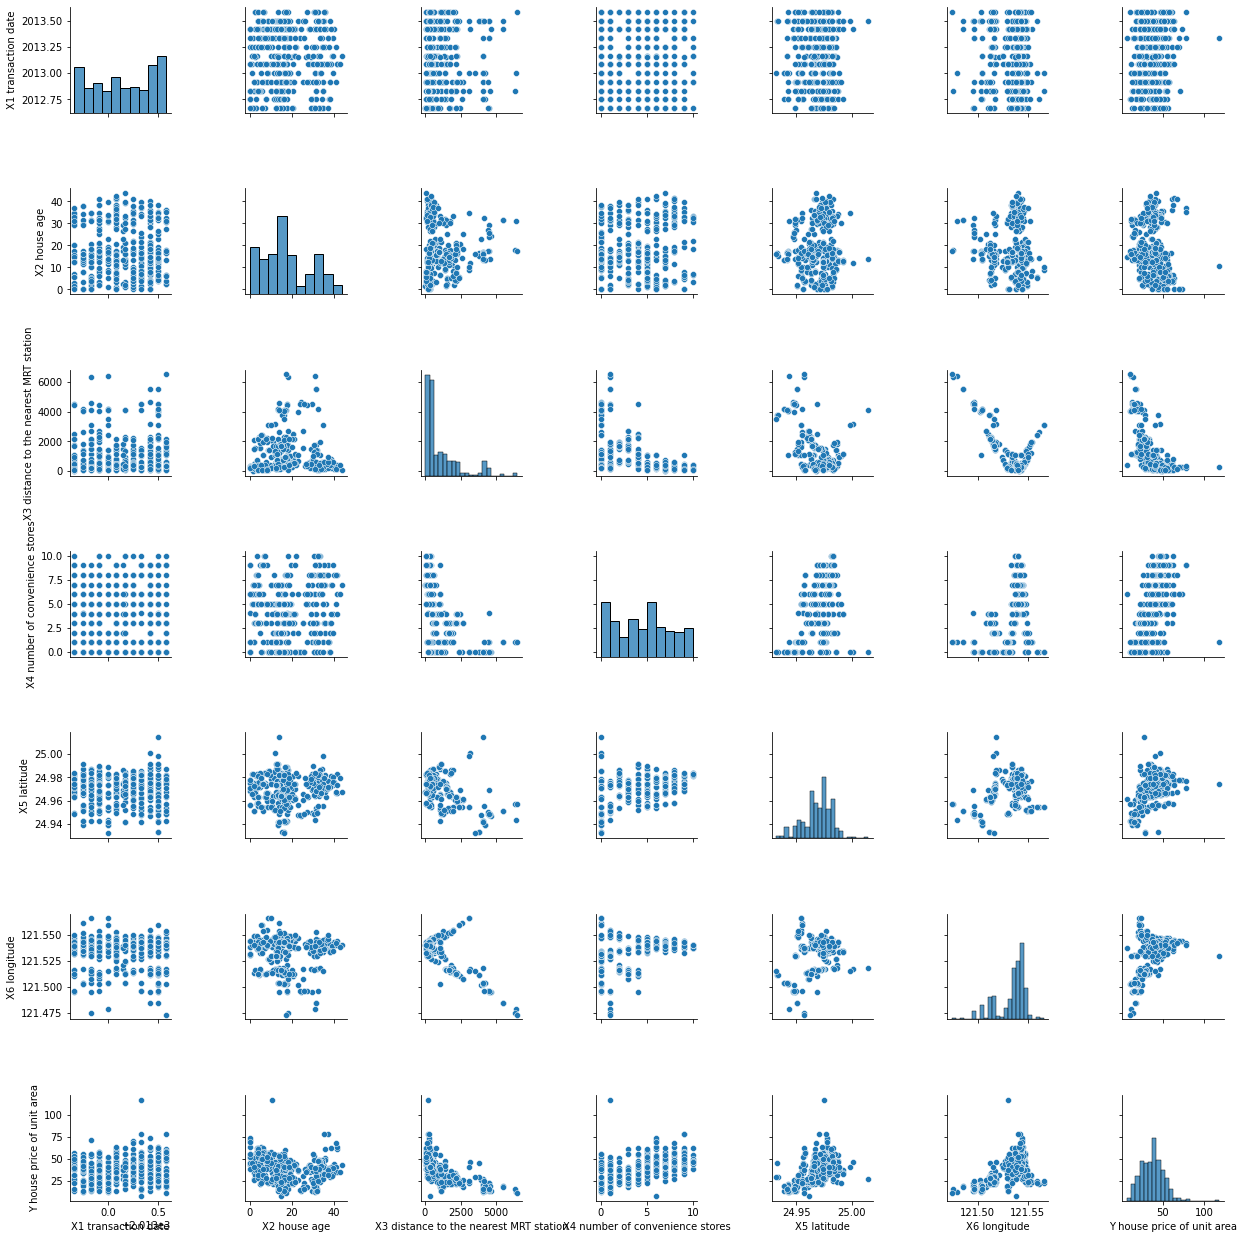

In [ ]:
sns.pairplot(df)

## **2. Linear Regression Model (Ridge)**

In [ ]:
reg5 = linear_model.Ridge(alpha=0.5)
reg5.fit(X_train, Y_train)

Ridge(alpha=0.5)

In [ ]:
reg5.coef_

array([ 5.70607260e+00, -1.76003065e-01, -5.07678720e-03,  1.41084910e+00,
        9.11893474e+00, -1.45597480e+00])

In [ ]:
reg5.intercept_

-11496.698000452256

### **Training Error and Accuracy**

In [ ]:
Y5_pred_train = reg5.predict(X_train)

In [ ]:
Y5_pred_train

array([41.24422698, 34.61151309, 34.51251608, 28.28277486, 33.23504924,
       48.29435107, 27.05668151, 45.0275199 , 49.16022556,  5.62142907,
       44.22857077, 35.01426216, 27.65088364, 44.32816714, 34.05489719,
       29.93671093, 31.63559407, 45.79692291, 31.74316917, 31.96525045,
       40.91757763, 42.69490635, 31.42167268, 47.93759668, 32.44487365,
       40.5253931 , 53.43145579, 45.23474705, 17.96057405, 23.06706108,
       41.19110352, 41.57496035, 35.49382009, 46.28820535, 28.51911296,
       35.12141604, 27.77140468, 43.74427071, 37.01803995, 34.78753829,
       42.94121384, 44.39535987, 42.48609875, 36.29579062, 52.51255834,
       51.1917578 , 30.02841385, 35.36618288, 43.08196885, 48.56796771,
       43.19799414, 11.68055914, 41.0645985 , 17.96057405, 37.36447442,
       48.83206749, 24.86803472, 45.78379929, 36.77989613, 52.02253795,
       34.26965042, 44.8722354 , 41.37168848, 38.49458036, 19.40692812,
       43.44312399, 22.9947786 , 35.62740129, 35.64534343, 37.99

In [ ]:
Y_train

319    26.9
20     29.3
112    23.1
93     16.1
91     43.2
       ... 
405    37.2
232    17.4
293    42.5
4      43.1
297    28.5
Name: Y house price of unit area, Length: 248, dtype: float64

In [ ]:
mean_squared_error(Y_train,Y5_pred_train)

72.33032616608186

In [ ]:
r2_score(Y_train, Y5_pred_train)

0.567724409849688

### **Testing Error and Accuracy**

In [ ]:
Y5_pred_test = reg5.predict(X_test)

In [ ]:
mean_squared_error(Y_test, Y5_pred_test)

102.21070202771007

In [ ]:
r2_score(Y_test, Y5_pred_test)

0.5011377493047491

### **Plot**

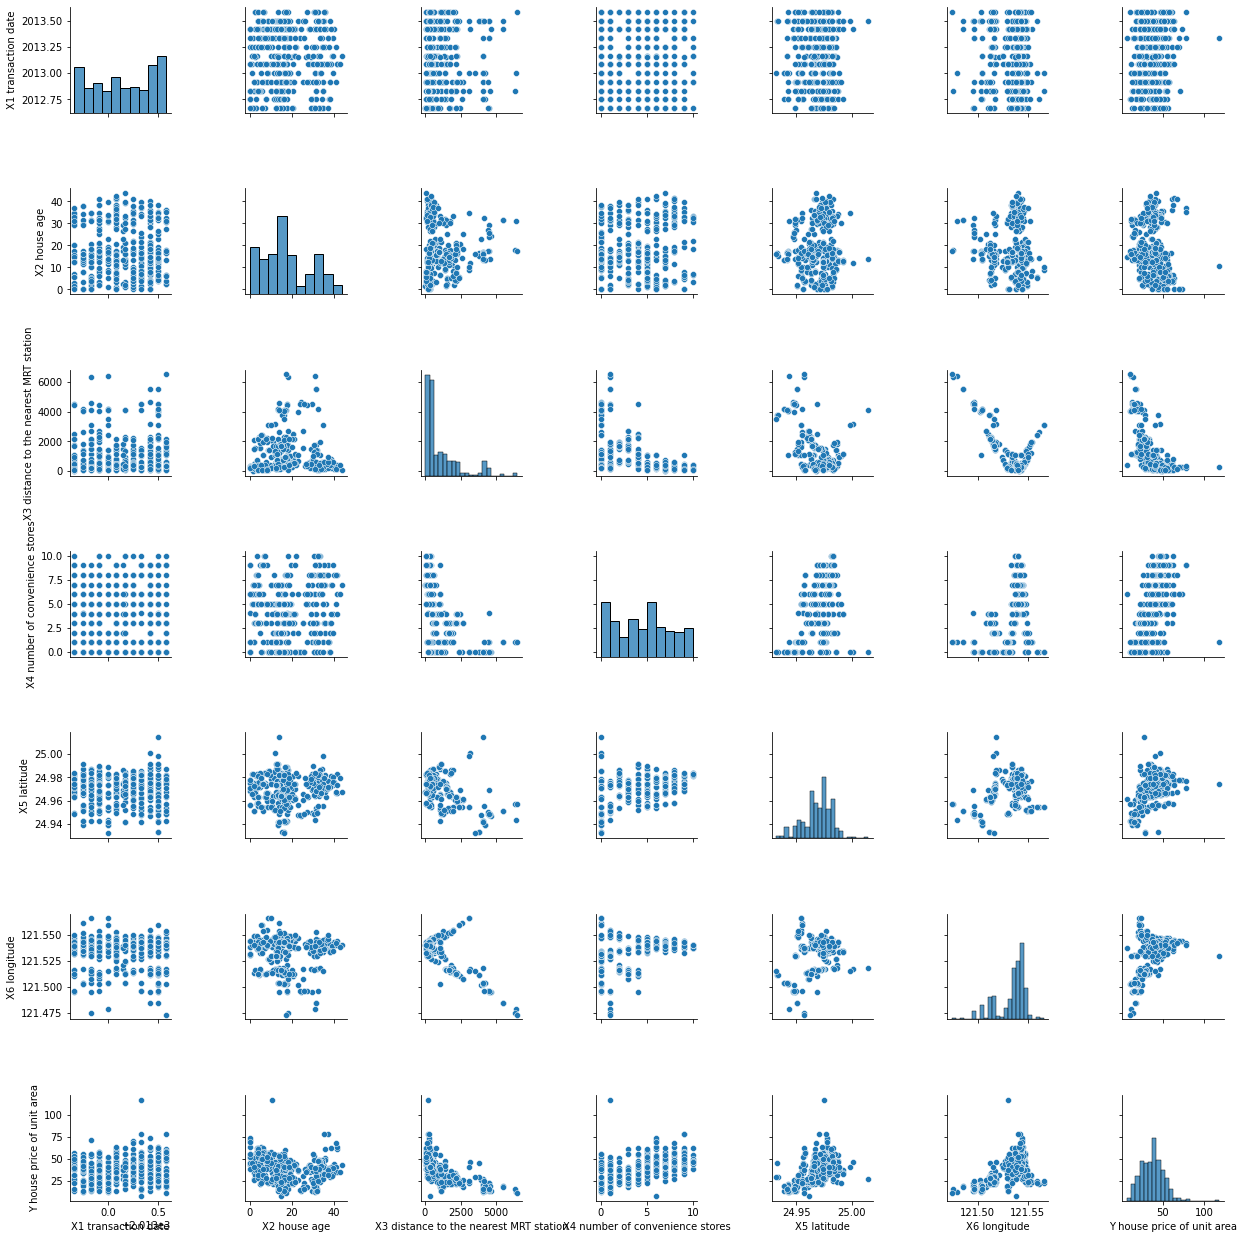

In [ ]:
sns.pairplot(df)

## **3. Linear Regression (Lasso)**

In [ ]:
reg6 = linear_model.Lasso(alpha=0.1)
reg6.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [ ]:
reg6.coef_

array([ 4.57970944, -0.17555623, -0.00508059,  1.41245639,  0.        ,
       -0.        ])

In [ ]:
reg6.intercept_

-9178.42594884891

### **Training Error and Accuracy**

In [ ]:
Y6_pred_train = reg6.predict(X_train)

In [ ]:
Y6_pred_train

array([41.2767447 , 34.32345381, 34.25667857, 28.72475995, 32.95344437,
       48.76771734, 27.37714858, 45.46876349, 48.90128765,  5.97779979,
       44.41399522, 34.77922305, 27.89306927, 44.55006085, 33.92293162,
       30.36694418, 32.07050249, 46.11228633, 31.79955365, 31.78159134,
       40.92956517, 42.26583102, 31.34217982, 48.50916632, 32.38013192,
       40.47211028, 53.20072409, 45.17180566, 18.13223684, 22.60741616,
       41.16010257, 41.89563733, 36.09089667, 46.05397735, 29.1508711 ,
       34.79496366, 28.30250792, 43.92929907, 37.0238639 , 34.47419197,
       42.94995178, 44.43251146, 42.84849346, 35.82432465, 52.41686541,
       50.71451203, 30.31209398, 35.08164851, 42.82134264, 48.59206221,
       43.30006601, 12.33992083, 40.49509641, 18.13223684, 37.44590939,
       48.66021169, 24.23754364, 45.60777717, 37.02518249, 52.07335236,
       33.86120987, 44.49728331, 41.49850052, 38.82224451, 19.19143911,
       43.51219933, 23.32774575, 35.65905365, 36.12995687, 38.29

In [ ]:
Y_train

319    26.9
20     29.3
112    23.1
93     16.1
91     43.2
       ... 
405    37.2
232    17.4
293    42.5
4      43.1
297    28.5
Name: Y house price of unit area, Length: 248, dtype: float64

In [ ]:
mean_squared_error(Y_train,Y6_pred_train)

72.81164742067025

In [ ]:
r2_score(Y_train, Y6_pred_train)

0.5648478373190825

### **Testing Error and Accuracy**

In [ ]:
Y6_pred_test = reg6.predict(X_test)

In [ ]:
mean_squared_error(Y_test, Y6_pred_test)

102.43854438148233

In [ ]:
r2_score(Y_test, Y6_pred_test)

0.5000257136064157

### **Plot**

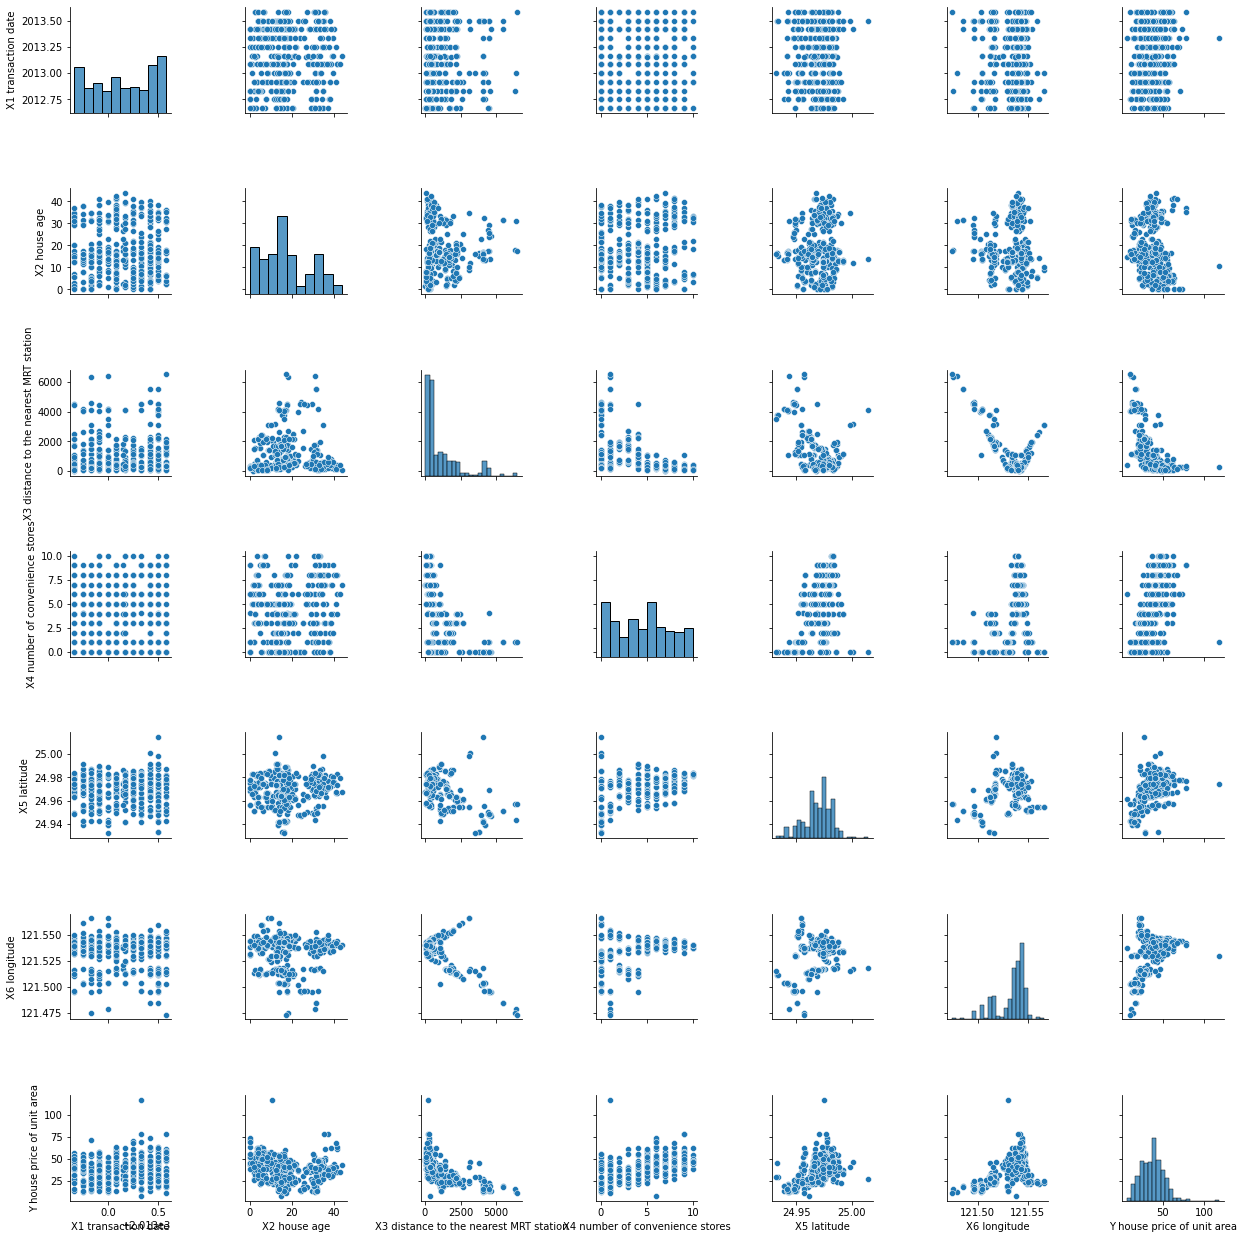

In [ ]:
sns.pairplot(df)